In [2]:
import networkx as nx
import pandas as pd

nodes_df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/game-of-thrones/got-nodes.csv")
edges_df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/game-of-thrones/got-edges.csv")

G = nx.from_pandas_edgelist(edges_df, source='Source', target='Target', edge_attr='Weight')

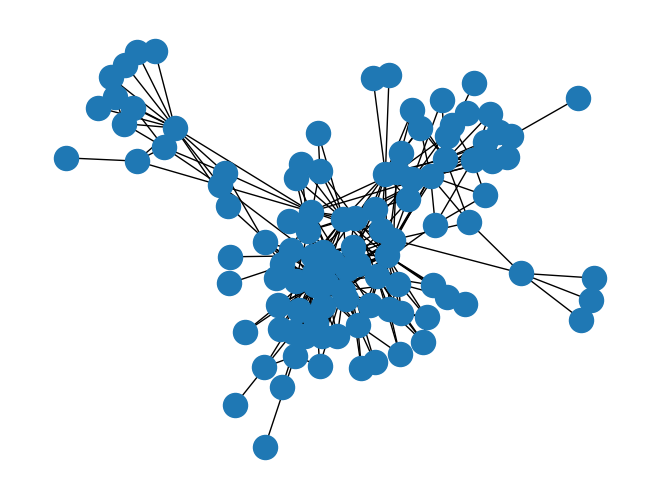

In [3]:
nx.draw(G)

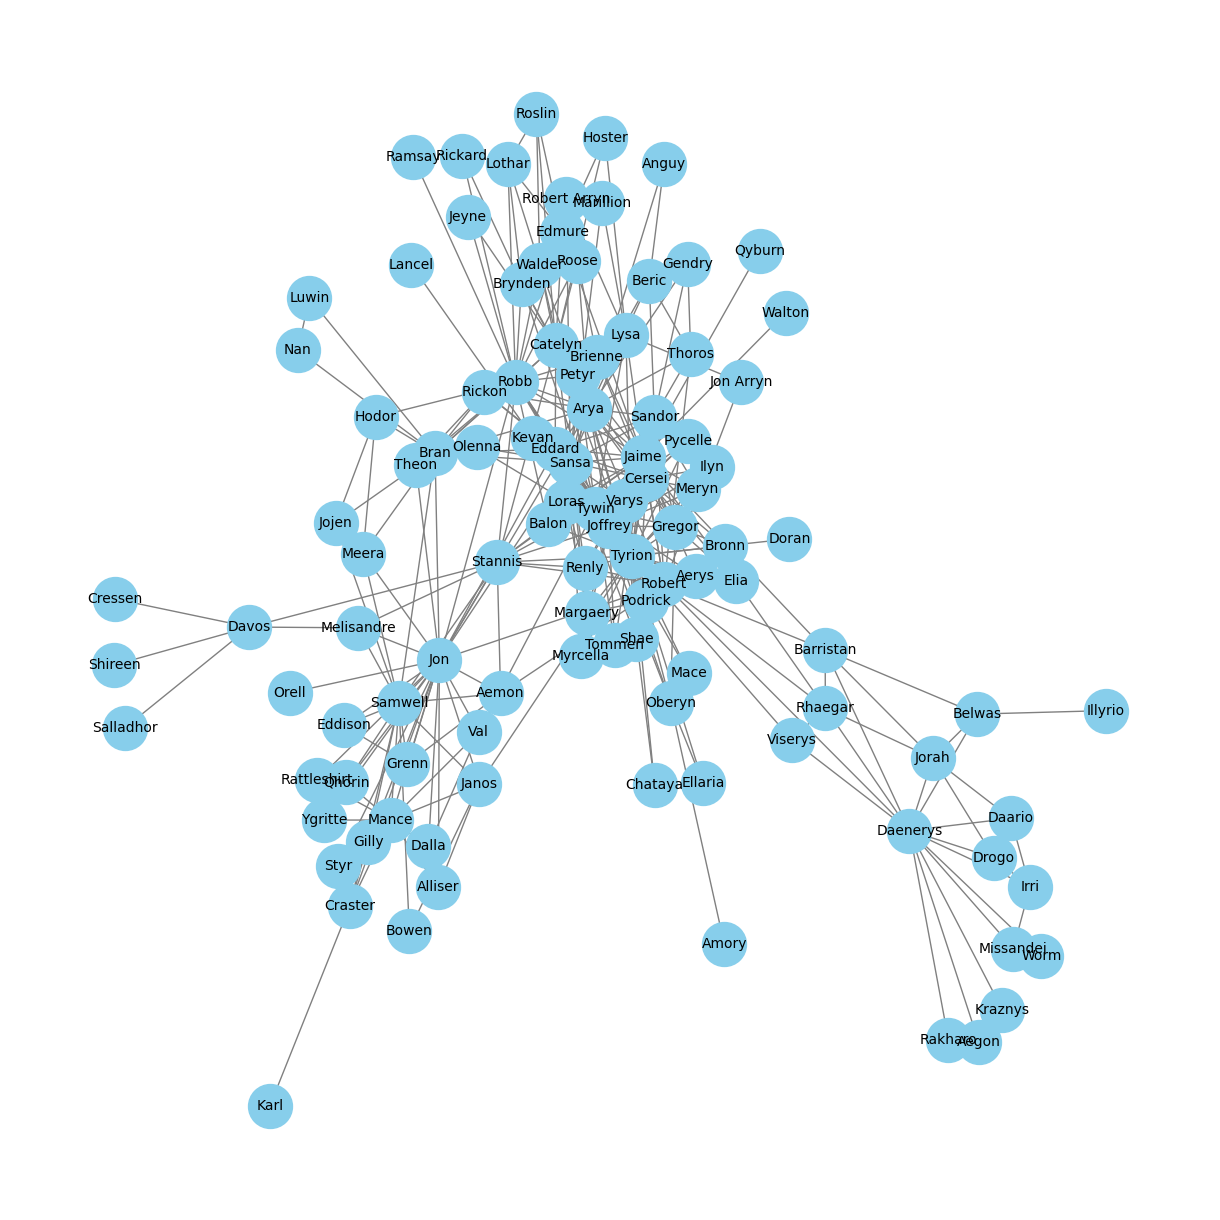

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_size=10, node_size=1000, node_color='skyblue', edge_color='gray')
plt.show()

In [5]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create dataframes from the centrality measures
degree_df = pd.DataFrame(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'Degree Centrality'])
betweenness_df = pd.DataFrame(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'Betweenness Centrality'])

# Print the top five nodes for each measure
print("Degree Centrality")
print(degree_df.head(5))
print("\nBetweenness Centrality")
print(betweenness_df.head(5))

Degree Centrality
     Node  Degree Centrality
0  Tyrion           0.339623
1     Jon           0.245283
2   Sansa           0.245283
3    Robb           0.235849
4   Jaime           0.226415

Betweenness Centrality
       Node  Betweenness Centrality
0       Jon                0.229965
1    Robert                0.209452
2    Tyrion                0.197913
3  Daenerys                0.157203
4      Robb                0.126964


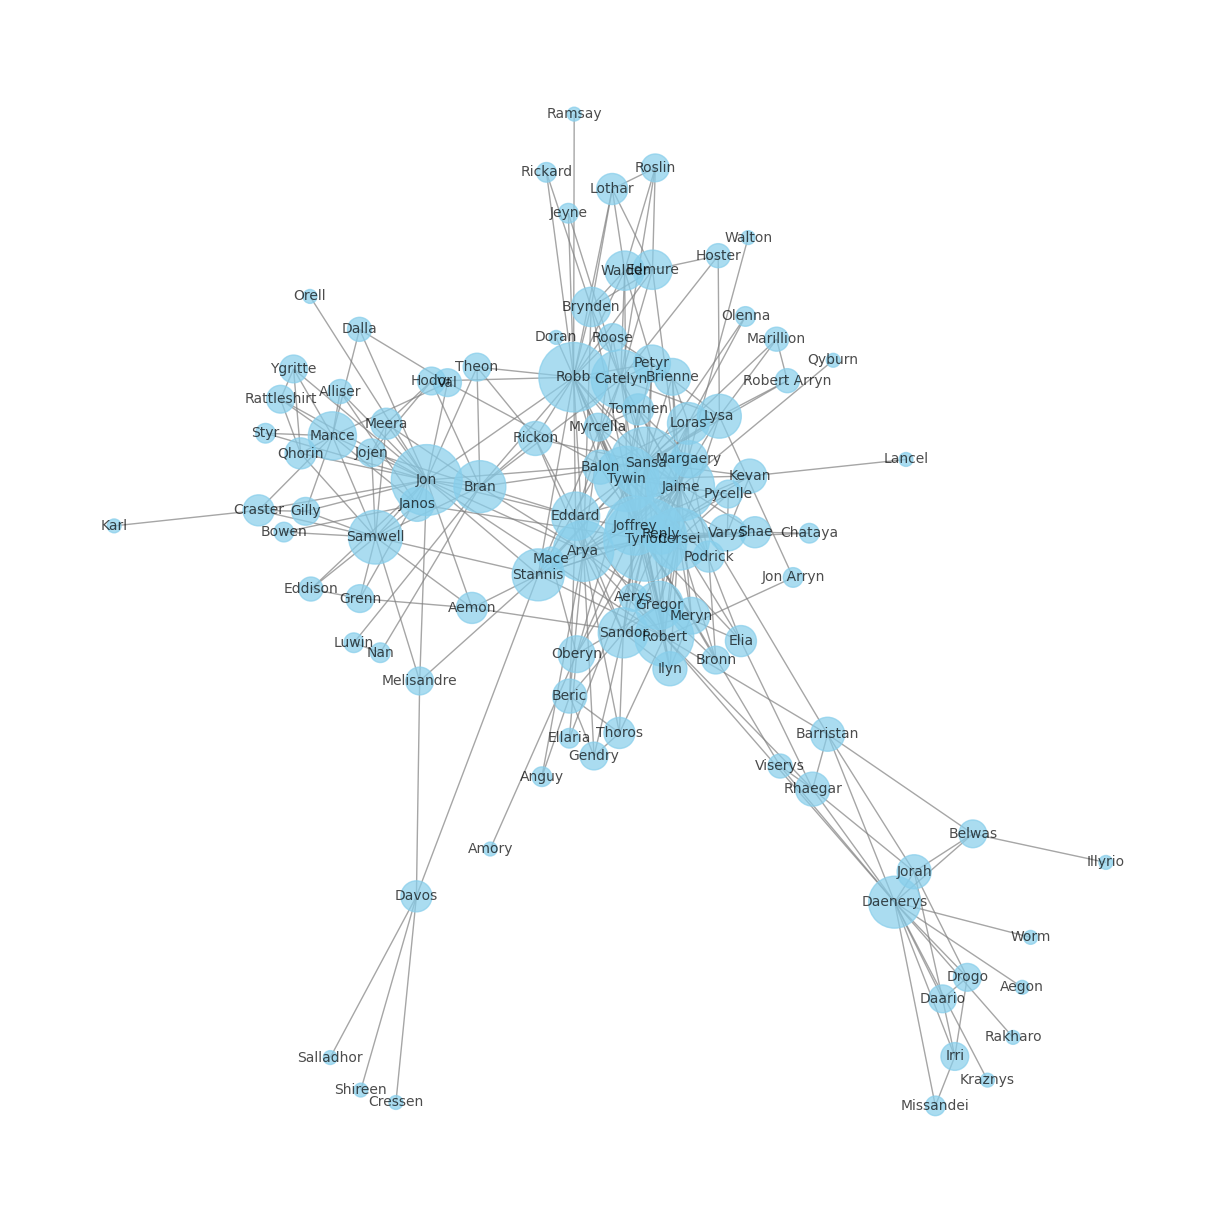

In [6]:
plt.figure(figsize=(12, 12))
node_size = [G.degree(v) * 100 for v in G]
nx.draw(G, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
plt.show()

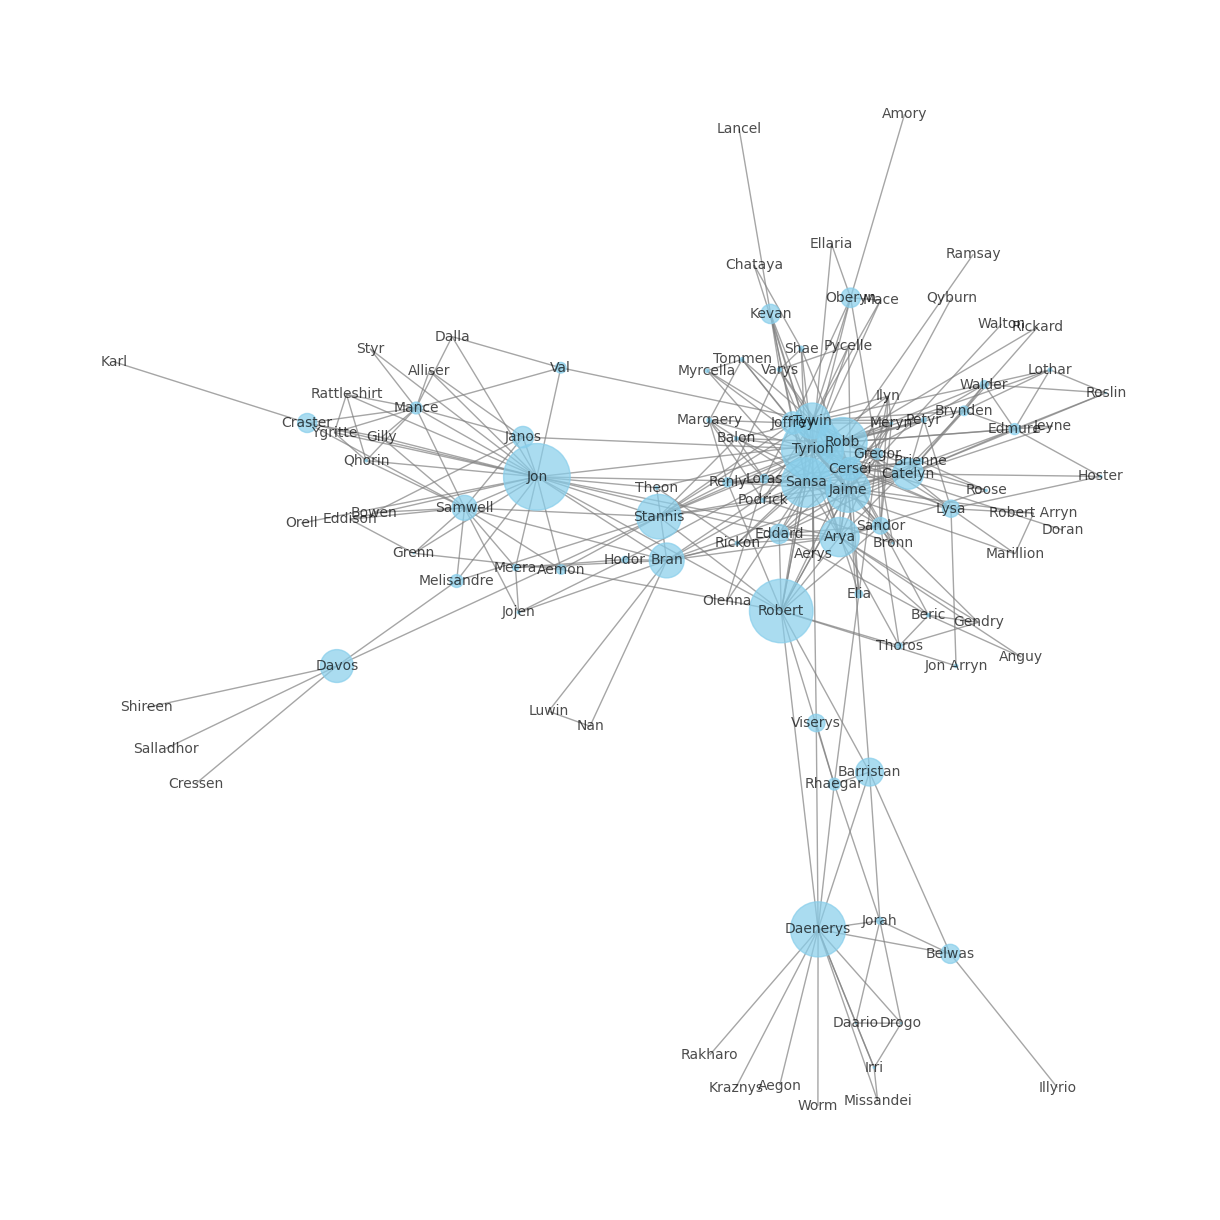

In [7]:
plt.figure(figsize=(12, 12))
node_size = [v * 10000 for v in betweenness_centrality.values()]
nx.draw(G, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray', node_size=node_size, alpha=0.7)
plt.show()

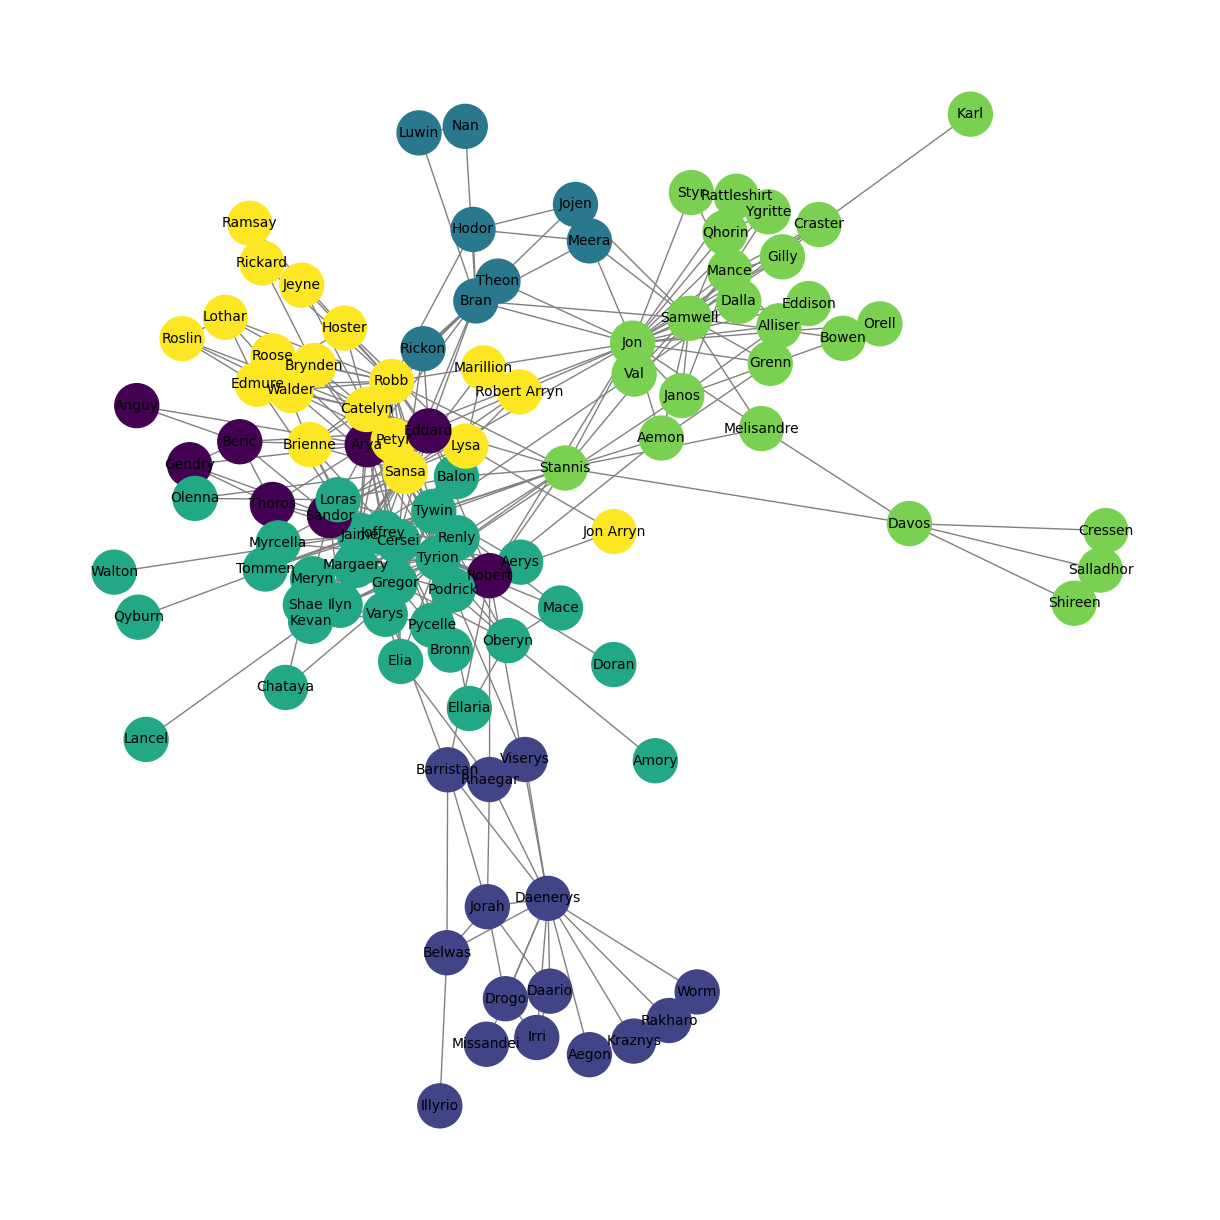

In [8]:
from networkx.algorithms import community

# Compute the best partition
communities = community.louvain_communities(G, seed=123)

# Create a dictionary that maps each node to its community
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i

# Create a list of colors based on the community of each node
colors = [community_map[node] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G,  node_color=colors, with_labels=True, font_size=10, node_size=1000, edge_color='gray')
plt.show()